In [3]:
# Preliminary code
# load pandas (always do this first)
import pandas as pd
import geopandas as gpd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

traffic_data=pd.read_csv("https://data.wprdc.org/datastore/dump/6dfd4f8f-cbf5-4917-a5eb-fd07f4403167")
neighborhoods = gpd.read_file("Neighborhoods/Neighborhoods_.shp")

/opt/tljh/user/lib/python3.8/site-packages/geopandas/_compat.py:84: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  warnings.warn(


# Combined data

This is a combination of our sub-metrics to find the best neighborhood. We decided to use the best place to go to school as our metric.

## Raja's findings

Based on my metric of what neighborhood had the least percentage of speeders (and hence the least speeders), I determined that the Central Buisness District was the best. Alleghany West, may be used in stead if the Central Buisness District does not have schools (there are probably more schools in Alleghany West).

### The data:

The code below determines the mean percent speeding for each neighborhood and stores it. It then displayes a map of the neighboorhoods and their respecive speeder percentage. The purpler it gets, the less speeders there are.

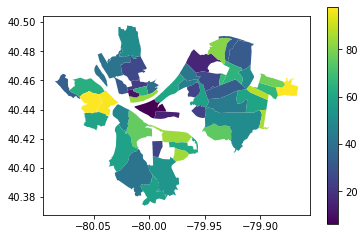

In [11]:
percent_speeding=traffic_data.groupby("neighborhood").mean()['percent_over_limit']
# Generate and plot traffic map
traffic_map=neighborhoods.merge(percent_speeding, how='left', left_on='hood', right_on='neighborhood')
traffic_map.plot(column='percent_over_limit', legend=True)

This code displayes a bar graph with the top 5 neighborhoods.

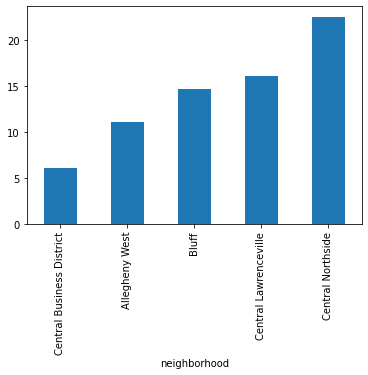

In [8]:
# Generate top 5 bar chart
percent_speeding.sort_values().head().plot(kind='bar')

As you can see, the one with the least traffic is the Central Buisness District, with Alleghany West coming in second.

## Friedrich's Analysis

In [ ]:
import pandas as pd

data = pd.read_csv("race.csv", sep=",")
data.head()


In [ ]:
import pandas as pd
import statistics as st

print("Measures diversity in neighboorhoods")

white = 1
black = 2
ai_an = 3
asian = 4
native_h = 5

cols = ["Estimate; Total: - White alone", "Estimate; Total: - Black or African American alone",
       "Estimate; Total: - American Indian and Alaska Native alone",
       "Estimate; Total: - Asian alone",
       "Estimate; Total: - Native Hawaiian and Other Pacific Islander alone"]



d2 = list()
for number in range(91):
    d2.append([])
    
for number in range(91):
    temp = list()
    for i in range(5):
        temp.append(int(data[cols[i]].values[number]))
        
    for i in range(temp[0]):
        d2[number].append(white)
    for i in range(temp[1]):
        d2[number].append(black)
    for i in range(temp[2]):
        d2[number].append(ai_an)
    for i in range(temp[3]):
        d2[number].append(asian)
    for i in range(temp[4]):
        d2[number].append(native_h)
        

dictx = list()
for number in range(91):
    Dict = {}
    std = st.stdev(d2[number])
    neigh = data['Neighborhood'].values[number]
    Dict['Neighborhood'] = neigh
    Dict['STD'] = std
    dictx.append(Dict)


#Dict = sorted(Dict.items(), key=lambda x: x[1], reverse=True)
#print(Dict)


import csv 
  
field_names = ['Neighborhood', 'STD'] 
  
with open('cool.csv', 'w') as csvfile: 
    writer = csv.DictWriter(csvfile, fieldnames = field_names) 
    writer.writeheader() 
    writer.writerows(dictx) 

        


datax = pd.read_csv("cool.csv", sep=",")
datax = datax.sort_values('STD',ascending=False)
#datax.sort_values(by=["STD"], ascending=False)
pd.set_option('display.max_rows', datax.shape[0]+1)
print(datax)


To find the diversity level of each neighborhood, I used standard deviation, which tells you how spread out the data is.
By assigning different values for different races 1-5. I was able to calculate the standard deviation of each neighborhood. The higher the standard deviation the more diverse the neighborhood is.  